In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
#checking for number of rows in train and test set
print("Number of rows in train set - " + str(len(x_train)))
print("Number of rows in test set - " + str(len(x_test)))

Number of rows in train set - 60000
Number of rows in test set - 10000


In [4]:
#creating labels for the 10 different pieces of clothing
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

label of item is:  Ankle boot


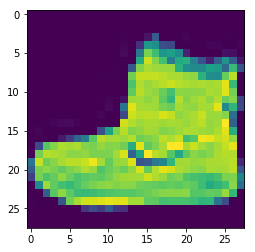

In [5]:
#Visualizing a single item from the train set eg first item on train set 
item_index = 0
plt.imshow(x_train[item_index])
item_label = y_train[item_index]

print("label of item is: ", fashion_mnist_labels[item_label])

`doesnt look like much, but yes... that is a boot:)`

In [6]:
#normalizing data to be on same scale
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [7]:
#splitting data into train, validate and test sets

#splitting train set into train and test to ease with hyperparameter tuning
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshaping input data from (28, 28) to (28, 28, 1)
w, h = 28, 28 #w,h as you mightve guessed corrspond to the width and height of the imgs
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# applying a one-hot encoding to the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
# Print validation set shape
print("x_valid shape:", x_valid.shape, "y_valid shape:", y_valid.shape)

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
x_valid shape: (5000, 28, 28, 1) y_valid shape: (5000, 10)


In [8]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
__________

In [10]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [14]:
#saves models after every epoch

from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 97s 2ms/step - loss: 0.6149 - acc: 0.7729 - val_loss: 0.3727 - val_acc: 0.8674

Epoch 00001: val_loss improved from inf to 0.37267, saving model to model.weights.best.hdf5
Epoch 2/10
55000/55000 [==============================] - 95s 2ms/step - loss: 0.4138 - acc: 0.8492 - val_loss: 0.3139 - val_acc: 0.8840

Epoch 00002: val_loss improved from 0.37267 to 0.31386, saving model to model.weights.best.hdf5
Epoch 3/10
55000/55000 [==============================] - 92s 2ms/step - loss: 0.3679 - acc: 0.8678 - val_loss: 0.2922 - val_acc: 0.8902

Epoch 00003: val_loss improved from 0.31386 to 0.29219, saving model to model.weights.best.hdf5
Epoch 4/10
55000/55000 [==============================] - 98s 2ms/step - loss: 0.3371 - acc: 0.8765 - val_loss: 0.2697 - val_acc: 0.9006

Epoch 00004: val_loss improved from 0.29219 to 0.26968, saving model to model.weights.best.hdf5
Epoch 5/10
55000/55

In [15]:
# Load the weights with the best validation accuracy
model.load_weights('model.weights.best.hdf5')

In [16]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9109


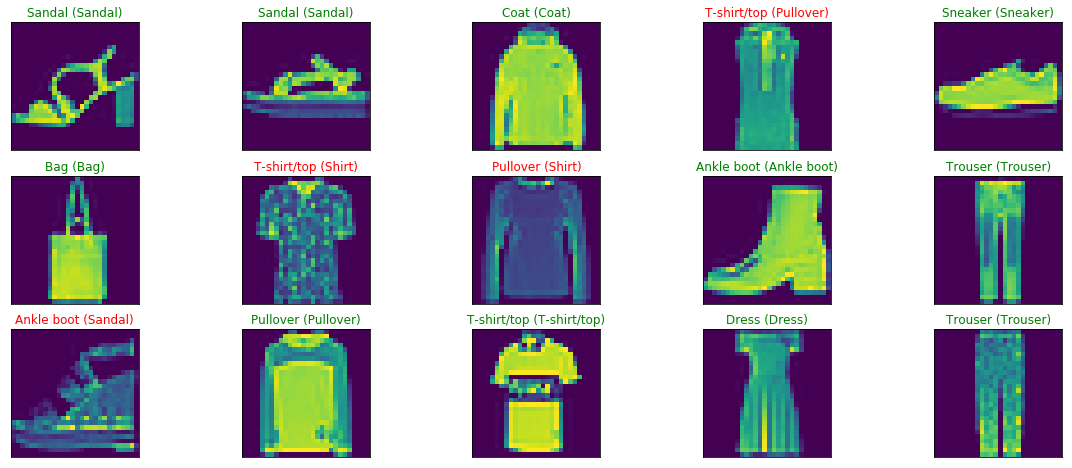

In [17]:
#visualizing the prediction
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))